In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
data.drop_duplicates(inplace=True)

# Missing values #1

**Deleting columns and rows with omissions**

In [6]:
data_missing_1 = data.copy()

In [7]:
data_missing_1.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

**Not all signs are shown**

In [8]:
print(data_missing_1.isnull().mean().to_string())

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

**Now you can see all the signs. Mean() shows the percentage of missing values, so it's more convenient**

In [9]:
data_missing_1.isnull().mean().sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

**Sort in descending order**

In [10]:
pd.DataFrame(data_missing_1.isnull().mean().sort_values(ascending=False).head(5)).T.columns

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [11]:
data_missing_1.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

**We remove signs where more than 50% of the missing values**

In [12]:
data_missing_1.isnull().mean().sort_values(ascending=False).head(15)

LotFrontage     0.177397
GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
PavedDrive      0.000000
dtype: float64

In [13]:
data_missing_1.dropna(axis=0, inplace=True)

**We output the remaining signs and delete the lines with omissions**

In [14]:
data_missing_1.isnull().mean()

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 76, dtype: float64

# Missing values #2

**Replace the missing values with the mode and median of the features**

In [15]:
data_missing_2 = data.copy()

In [16]:
data_missing_2.isnull().mean().sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [17]:
data_missing_2.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

**If there are more than 50% missing values in the attribute, then we delete the attribute completely.**

In [18]:
pd.DataFrame(data_missing_2.isnull().mean().sort_values(ascending=False)).head(20).T.columns

Index(['LotFrontage', 'GarageType', 'GarageCond', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical', 'PavedDrive', 'WoodDeckSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [19]:
data_missing_2[['LotFrontage', 'GarageType', 'GarageCond', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical', 'PavedDrive', 'WoodDeckSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath']]

,LotFrontage,GarageType,GarageCond,GarageYrBlt,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical,PavedDrive,WoodDeckSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath
0,65.0,Attchd,TA,2003.0,RFn,TA,Unf,No,GLQ,TA,Gd,196.0,BrkFace,SBrkr,Y,0,0,1710,1,0
1,80.0,Attchd,TA,1976.0,RFn,TA,Unf,Gd,ALQ,TA,Gd,0.0,None,SBrkr,Y,298,0,1262,0,1
2,68.0,Attchd,TA,2001.0,RFn,TA,Unf,Mn,GLQ,TA,Gd,162.0,BrkFace,SBrkr,Y,0,0,1786,1,0
3,60.0,Detchd,TA,1998.0,Unf,TA,Unf,No,ALQ,Gd,TA,0.0,None,SBrkr,Y,0,0,1717,1,0
4,84.0,Attchd,TA,2000.0,RFn,TA,Unf,Av,GLQ,TA,Gd,350.0,BrkFace,SBrkr,Y,192,0,2198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,Attchd,TA,1999.0,RFn,TA,Unf,No,Unf,TA,Gd,0.0,None,SBrkr,Y,0,0,1647,0,0
1456,85.0,Attchd,TA,1978.0,Unf,TA,Rec,No,ALQ,TA,Gd,119.0,Stone,SBrkr,Y,349,0,2073,1,0
1457,66.0,Attchd,TA,1941.0,RFn,TA,Unf,No,GLQ,Gd,TA,0.0,None,SBrkr,Y,0,0,2340,0,0
1458,68.0,Attchd,TA,1950.0,Unf,TA,Rec,Mn,GLQ,TA,TA,0.0,None,FuseA,Y,366,0,1078,1,0


In [20]:
column_mode = ['GarageType', 'GarageCond', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical', 'PavedDrive', 'WoodDeckSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath']

In [21]:
for i in column_mode:
    data_missing_2[i] = data_missing_2[i].fillna(mode(data_missing_2[i]))

In [22]:
data_missing_2['BsmtFinType2'].mode()

0    Unf
dtype: object

**In all categorical variables and variables with 0, we replace the missing values to the mode().**

In [23]:
pd.DataFrame(data_missing_2.corr()['LotFrontage'].abs()).sort_values('LotFrontage', ascending=False)

,LotFrontage
LotFrontage,1.000000
1stFlrSF,0.457181
LotArea,0.426095
GrLivArea,0.402797
TotalBsmtSF,0.392075
MSSubClass,0.386347
TotRmsAbvGrd,0.352096
SalePrice,0.351799
GarageArea,0.344997
GarageCars,0.285691


**We look at which signs are correlated the most. Building a model, the target variable -  Lot Frontpage.**  
  
**<li>train - data with the LotFrontage value;**
**<li>test - data with missing LotFrontage values.**

# Missing values #3

**Replacing Nan with the value 'no_info'**

In [24]:
data_missing_3 = data.copy()

In [25]:
data_missing_3.fillna('no_info', inplace=True)

In [26]:
data_missing_3.isnull().mean()

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

In [27]:
data_missing_3.groupby('BsmtQual')['SalePrice'].agg(['count', 'mean', 'median'])

,count,mean,median
BsmtQual,,,
Ex,121,327041.041322,318000.0
Fa,35,115692.028571,112000.0
Gd,618,202688.478964,192070.0
TA,649,140759.818182,135500.0
no_info,37,105652.891892,101800.0


**This is necessary for such an analysis of variables**

# Outliers in the target variable

<AxesSubplot:>

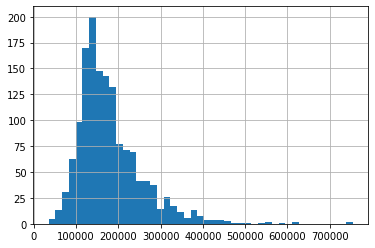

In [28]:
data.SalePrice.hist(bins=45)

# Outliers  - interquartile range

**We remove outliers beyond the 25 and 75 quantile * 1.5**

In [29]:
data_quantile = data.copy()

In [30]:
IQR = data_quantile.SalePrice.quantile(0.75) - data_quantile.SalePrice.quantile(0.25)

In [31]:
Lower = data_quantile.SalePrice.quantile(0.25) - (IQR * 1.5)
Upper = data_quantile.SalePrice.quantile(0.75) + (IQR * 1.5)

In [32]:
data_quantile = data_quantile[data_quantile.SalePrice.between(Lower, Upper)]

<AxesSubplot:>

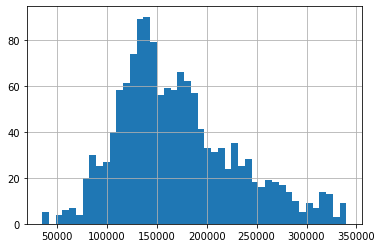

In [33]:
data_quantile.SalePrice.hist(bins=45)

# Outliers  - 3 standard deviations

In [34]:
data_std = data.copy()

In [35]:
std_3 = data_std.SalePrice.std() * 3

In [36]:
mean_sp = data_std.SalePrice.mean()

In [37]:
data_std = data_std[data_std.SalePrice.between(mean_sp - std_3, mean_sp + std_3)]

<AxesSubplot:>

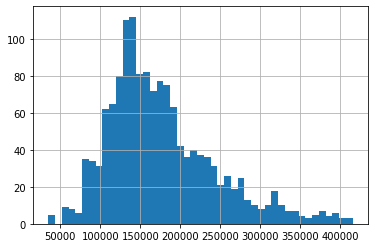

In [38]:
data_std.SalePrice.hist(bins=45)

# Outliers - specific value

In [39]:
data_fix = data.copy()

<AxesSubplot:>

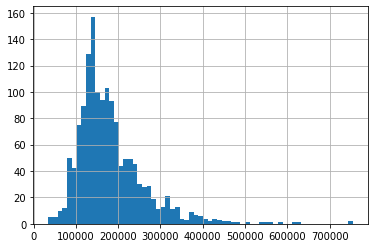

In [40]:
data_fix.SalePrice.hist(bins=65)

In [41]:
data_fix = data_fix[data_fix['SalePrice'] <= 500000]

<AxesSubplot:>

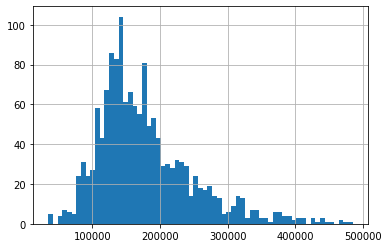

In [42]:
data_fix.SalePrice.hist(bins=65)

# Encoding - LabelEncoder

**Apply encoding to the data where there are no missing values!**

In [43]:
data_type = pd.DataFrame(data_missing_2.dtypes)

In [44]:
data_type[data_type[0] == 'object'].T.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
data_missing_2[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [46]:
col_encoder = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

In [47]:
labelencoder = LabelEncoder()
for i in col_encoder:
    data_missing_2[i] = labelencoder.fit_transform(data_missing_2[i])

In [48]:
data_missing_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


# Encoding - get_dummies

**Transform all signs with the type 'object' into values 1 / 0**

In [49]:
pd.DataFrame(data_missing_1.dtypes)

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [50]:
pd.DataFrame(data_missing_1.dtypes)[pd.DataFrame(data_missing_1.dtypes)[0] == 'object'].T.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [51]:
data_missing_1 = pd.get_dummies(data_missing_1)

In [52]:
pd.DataFrame(data_missing_1.dtypes)[pd.DataFrame(data_missing_1.dtypes)[0] == 'object'].T.columns

Index([], dtype='object')

# Scaling - StandardScaler

**Encoding is applied to categorical variables, scaling is applied to continuous variables**

In [53]:
data_missing_1.nunique().sort_values(ascending=False).head(20)

Id               1094
LotArea           806
GrLivArea         720
BsmtUnfSF         677
1stFlrSF          650
TotalBsmtSF       621
SalePrice         560
BsmtFinSF1        523
GarageArea        394
2ndFlrSF          346
MasVnrArea        279
WoodDeckSF        221
OpenPorchSF       176
YearBuilt         109
BsmtFinSF2        107
LotFrontage       107
EnclosedPorch      98
GarageYrBlt        97
ScreenPorch        63
YearRemodAdd       61
dtype: int64

In [54]:
data_missing_1[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']]

,LotArea,GrLivArea,BsmtUnfSF,1stFlrSF
0,8450,1710,150,856
1,9600,1262,284,1262
2,11250,1786,434,920
3,9550,1717,540,961
4,14260,2198,490,1145
...,...,...,...,...
1455,7917,1647,953,953
1456,13175,2073,589,2073
1457,9042,2340,877,1188
1458,9717,1078,0,1078


In [55]:
ss = StandardScaler().fit(data_missing_1[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']])
data_missing_1[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']] = ss.transform(data_missing_1[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']])

In [56]:
data_missing_1[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']]

,LotArea,GrLivArea,BsmtUnfSF,1stFlrSF
0,-0.204952,0.332721,-1.023531,-0.820154
1,-0.064853,-0.519179,-0.722834,0.227587
2,0.136158,0.477240,-0.386232,-0.654993
3,-0.070944,0.346032,-0.148367,-0.549186
4,0.502851,1.260683,-0.260568,-0.074348
...,...,...,...,...
1455,-0.269885,0.212923,0.778409,-0.569832
1456,0.370671,1.022988,-0.038411,2.320489
1457,-0.132831,1.530705,0.607864,0.036620
1458,-0.050600,-0.869066,-1.360133,-0.247251


In [57]:
data_missing_1.LotArea.std()

1.0004573519562239

**Processes the data so that the standard deviation == 1**

## Scaling - MinMax

In [58]:
data_missing_2.nunique().sort_values(ascending=False).head(20)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
dtype: int64

In [59]:
data_missing_2[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']]

,LotArea,GrLivArea,BsmtUnfSF,1stFlrSF
0,8450,1710,150,856
1,9600,1262,284,1262
2,11250,1786,434,920
3,9550,1717,540,961
4,14260,2198,490,1145
...,...,...,...,...
1455,7917,1647,953,953
1456,13175,2073,589,2073
1457,9042,2340,877,1188
1458,9717,1078,0,1078


In [60]:
MinMax = MinMaxScaler().fit(data_missing_2[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']])
data_missing_2[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']] = MinMax.transform(data_missing_2[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']])

In [61]:
data_missing_2[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']]

,LotArea,GrLivArea,BsmtUnfSF,1stFlrSF
0,0.033420,0.259231,0.064212,0.119780
1,0.038795,0.174830,0.121575,0.212942
2,0.046507,0.273549,0.185788,0.134465
3,0.038561,0.260550,0.231164,0.143873
4,0.060576,0.351168,0.209760,0.186095
...,...,...,...,...
1455,0.030929,0.247362,0.407962,0.142038
1456,0.055505,0.327619,0.252140,0.399036
1457,0.036187,0.377920,0.375428,0.195961
1458,0.039342,0.140166,0.000000,0.170721


In [62]:
data_missing_2[['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF']].describe().T[['min', 'max']]

,min,max
LotArea,0.0,1.0
GrLivArea,0.0,1.0
BsmtUnfSF,0.0,1.0
1stFlrSF,0.0,1.0


**MIN and MAX values == 0 and 1**